In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import sys, os 
src_path = os.path.abspath('../../../')
sys.path.append(src_path)

plans_path = os.path.abspath('../solutions')

from acc_2021.penumatic_hopper.config_penumatic_hopper import *
import scipy.linalg as scl

from utils.simulation import visualize



import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as m_lines
import matplotlib.patches as m_patches
from matplotlib.collections import PatchCollection


In [2]:
# load ddp results
ddp_xsim = np.load("ddp/ddp_xsim.npy")
ddp_xhsim= np.load("ddp/ddp_xhsim.npy") 
ddp_usim= np.load("ddp/ddp_usim.npy")
ddp_Ksim = np.load("ddp/ddp_Ksim.npy") 
ddp_fsim = np.load("ddp/ddp_fsim.npy") 
# load risk averse results sigma = -0.5 
averse_xsim = np.load("risk_averse/averse_xsim.npy")
averse_xhsim= np.load("risk_averse/averse_xhsim.npy") 
averse_usim= np.load("risk_averse/averse_usim.npy")
averse_Ksim_ = np.load("risk_averse/averse_Ksim.npy") 
averse_fsim = np.load("risk_averse/averse_fsim.npy") 
# load risk seeking results sigma = 10. 
seeking_xsim = np.load("risk_seeking/seeking_xsim.npy")
seeking_xhsim= np.load("risk_seeking/seeking_xhsim.npy") 
seeking_usim= np.load("risk_seeking/seeking_usim.npy")
seeking_Ksim_ = np.load("risk_seeking/seeking_Ksim.npy") 
seeking_fsim = np.load("risk_seeking/seeking_fsim.npy") 



# load plans 
ddp_xplan = np.load(plans_path+"/ddp_xs.npy")
ddp_uplan = np.load(plans_path+"/ddp_us.npy")
ddp_Kplan = np.load(plans_path+"/ddp_K.npy")

averse_xplan = np.load(plans_path+"/risk_averse/iRiSC_xs.npy")
averse_uplan = np.load(plans_path+"/risk_averse/iRiSC_us.npy")
averse_Kplan_ = np.load(plans_path+"/risk_averse/iRiSC_K.npy")

seeking_xplan = np.load(plans_path+"/risk_seeking/iRiSC_xs.npy")
seeking_uplan = np.load(plans_path+"/risk_seeking/iRiSC_us.npy")
seeking_Kplan_ = np.load(plans_path+"/risk_seeking/iRiSC_K.npy")

averse_Ksim = np.zeros([1000, 200, 4])
seeking_Ksim = np.zeros([1000, 200, 4])
averse_Kplan = np.zeros([200,4])
seeking_Kplan = np.zeros([200,4])
for i in range(1000):
    for t in range(200):
        averse_Ksim[i,t,:] = averse_Ksim_[i,t,0,:]
        seeking_Ksim[i,t,:] = seeking_Ksim_[i,t,0,:]
        if i == 0:
            seeking_Kplan[i,:] = seeking_Kplan_[i,0,:]
            averse_Kplan[i,:] = averse_Kplan_[i,0,:]



In [3]:
state_names = ["$q^h$","$q^f$","$v^h$","$v^f$" ]
# first compute foot absolute positions and velocities 

time_array = plan_dt*np.arange(horizon+1)
ddp_foot_planned = ddp_xplan[:,0] - ddp_xplan[:,1] - .5*np.ones_like(time_array)
ddp_foot_actual = ddp_xsim[:,:,0] - ddp_xsim[:,:,1] - .5*np.ones_like(time_array)
ddp_foot_estimated = ddp_xhsim[:,:,0] - ddp_xhsim[:,:,1] - .5*np.ones_like(time_array)


averse_foot_planned =averse_xplan[:,0] - averse_xplan[:,1] - .5*np.ones_like(time_array)
averse_foot_actual = averse_xsim[:,:,0] - averse_xsim[:,:,1] - .5*np.ones_like(time_array)
averse_foot_estimated = averse_xhsim[:,:,0] - averse_xhsim[:,:,1] - .5*np.ones_like(time_array)


seeking_foot_planned = seeking_xplan[:,0] - seeking_xplan[:,1] - .5*np.ones_like(time_array)
seeking_foot_actual = seeking_xsim[:,:,0] - seeking_xsim[:,:,1] - .5*np.ones_like(time_array)
seeking_foot_estimated = seeking_xhsim[:,:,0] - seeking_xhsim[:,:,1] - .5*np.ones_like(time_array)




## Simulation Mean

In [4]:
# compute mean
ddp_xsim_mean = np.mean(ddp_xsim, axis=0)
ddp_xhsim_mean = np.mean(ddp_xhsim, axis=0)
ddp_usim_mean = np.mean(ddp_usim, axis=0)
ddp_Ksim_mean = np.mean(ddp_Ksim, axis=0)
ddp_fsim_mean = np.mean(ddp_fsim, axis=0)
ddp_foot_actual_mean = np.mean(ddp_foot_actual, axis=0)
ddp_foot_estimated_mean = np.mean(ddp_foot_estimated, axis=0)

averse_xsim_mean = np.mean(averse_xsim, axis=0)
averse_xhsim_mean = np.mean(averse_xhsim, axis=0)
averse_usim_mean = np.mean(averse_usim, axis=0)
averse_Ksim_mean = np.mean(averse_Ksim, axis=0)
averse_fsim_mean = np.mean(averse_fsim, axis=0)
averse_foot_actual_mean = np.mean(averse_foot_actual, axis=0)
averse_foot_estimated_mean = np.mean(averse_foot_estimated, axis=0)

seeking_xsim_mean = np.mean(seeking_xsim, axis=0)
seeking_xhsim_mean = np.mean(seeking_xhsim, axis=0)
seeking_usim_mean = np.mean(seeking_usim, axis=0)
seeking_Ksim_mean = np.mean(seeking_Ksim, axis=0)
seeking_fsim_mean = np.mean(seeking_fsim, axis=0)
seeking_foot_actual_mean = np.mean(seeking_foot_actual, axis=0)
seeking_foot_estimated_mean = np.mean(seeking_foot_estimated, axis=0)



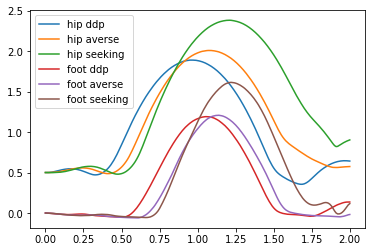

In [5]:
plt.figure("average trajectory")
plt.plot(time_array, ddp_xsim_mean[:,0], label="hip ddp")
plt.plot(time_array, averse_xsim_mean[:,0], label="hip averse")
plt.plot(time_array, seeking_xsim_mean[:,0], label="hip seeking")
plt.plot(time_array, ddp_foot_actual_mean[:], label="foot ddp")
plt.plot(time_array, averse_foot_actual_mean[:], label="foot averse")
plt.plot(time_array, seeking_foot_actual_mean[:], label="foot seeking")
plt.legend()

## Simulation Standard Deviation 

In [6]:
ddp_xsim_std = np.std(ddp_xsim, axis=0)
ddp_xhsim_std = np.std(ddp_xhsim, axis=0)
ddp_usim_std = np.std(ddp_usim, axis=0)
ddp_Ksim_std = np.std(ddp_Ksim, axis=0)
ddp_fsim_std = np.std(ddp_fsim, axis=0)
ddp_foot_actual_std = np.std(ddp_foot_actual, axis=0)
ddp_foot_estimated_std = np.std(ddp_foot_estimated, axis=0)

averse_xsim_std = np.std(averse_xsim, axis=0)
averse_xhsim_std = np.std(averse_xhsim, axis=0)
averse_usim_std = np.std(averse_usim, axis=0)
averse_Ksim_std = np.std(averse_Ksim, axis=0)
averse_fsim_std = np.std(averse_fsim, axis=0)
averse_foot_actual_std = np.std(averse_foot_actual, axis=0)
averse_foot_estimated_std = np.std(averse_foot_estimated, axis=0)

seeking_xsim_std = np.std(seeking_xsim, axis=0)
seeking_xhsim_std = np.std(seeking_xhsim, axis=0)
seeking_usim_std = np.std(seeking_usim, axis=0)
seeking_Ksim_std = np.std(seeking_Ksim, axis=0)
seeking_fsim_std = np.std(seeking_fsim, axis=0)
seeking_foot_actual_std = np.std(seeking_foot_actual, axis=0)
seeking_foot_estimated_std = np.std(seeking_foot_estimated, axis=0)

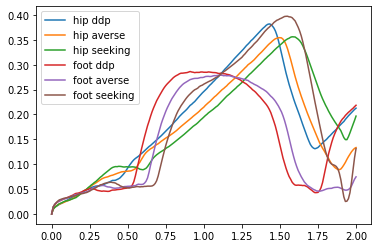

In [7]:
plt.figure("standard deviation of trajectory")
plt.plot(time_array, ddp_xsim_std[:,0], label="hip ddp")
plt.plot(time_array, averse_xsim_std[:,0], label="hip averse")
plt.plot(time_array, seeking_xsim_std[:,0], label="hip seeking")
plt.plot(time_array, ddp_foot_actual_std[:], label="foot ddp")
plt.plot(time_array, averse_foot_actual_std[:], label="foot averse")
plt.plot(time_array, seeking_foot_actual_std[:], label="foot seeking")
plt.legend()

## Estimation Mean & Standard Deviation Plots

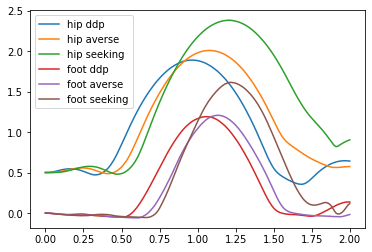

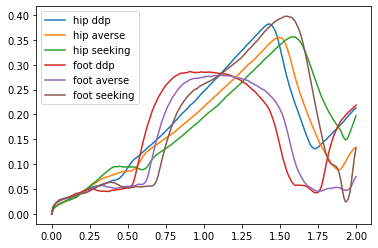

In [8]:
plt.figure("estimation mean trajectory")
plt.plot(time_array, ddp_xhsim_mean[:,0], label="hip ddp")
plt.plot(time_array, averse_xhsim_mean[:,0], label="hip averse")
plt.plot(time_array, seeking_xhsim_mean[:,0], label="hip seeking")
plt.plot(time_array, ddp_foot_estimated_mean[:], label="foot ddp")
plt.plot(time_array, averse_foot_estimated_mean[:], label="foot averse")
plt.plot(time_array, seeking_foot_estimated_mean[:], label="foot seeking")
plt.legend()


plt.figure("estimation standard deviation trajectory")
plt.plot(time_array, ddp_xhsim_std[:,0], label="hip ddp")
plt.plot(time_array, averse_xhsim_std[:,0], label="hip averse")
plt.plot(time_array, seeking_xhsim_std[:,0], label="hip seeking")
plt.plot(time_array, ddp_foot_estimated_std[:], label="foot ddp")
plt.plot(time_array, averse_foot_estimated_std[:], label="foot averse")
plt.plot(time_array, seeking_foot_estimated_std[:], label="foot seeking")
plt.legend()

# Norm of Feedback Gains

In [9]:
averse_Kp_mean = []
averse_Kd_mean = []
seeking_Kp_mean = []
seeking_Kd_mean = []
for i in range(200):
    averse_Kp_mean += [scl.norm(averse_Ksim_mean[:,:2])]
    averse_Kd_mean += [scl.norm(averse_Ksim_mean[:,2:])]
    seeking_Kp_mean += [scl.norm(seeking_Ksim_mean[:,:2])]
    seeking_Kd_mean += [scl.norm(seeking_Ksim_mean[:,2:])]

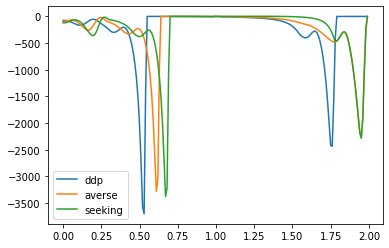

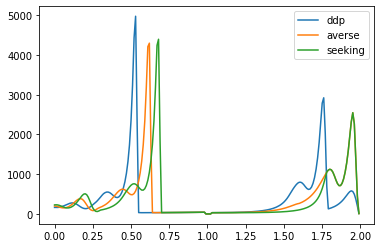

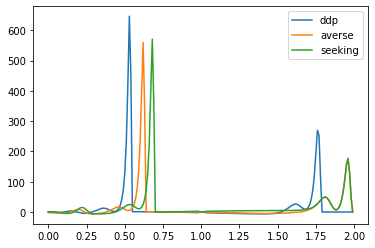

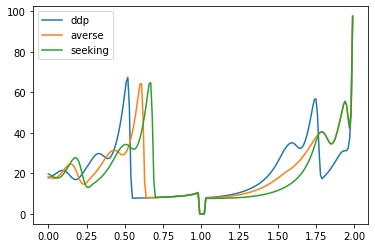

In [10]:
plt.figure(" Kd %s"%state_names[0])
plt.plot(time_array[:-1], ddp_Ksim_mean[:,0], label="ddp")
plt.plot(time_array[:-1], averse_Ksim_mean[:,0], label="averse")
plt.plot(time_array[:-1], seeking_Ksim_mean[:,0], label="seeking")
plt.legend()

plt.figure(" Kd %s"%state_names[1])
plt.plot(time_array[:-1], ddp_Ksim_mean[:,1], label="ddp")
plt.plot(time_array[:-1], averse_Ksim_mean[:,1], label="averse")
plt.plot(time_array[:-1], seeking_Ksim_mean[:,1], label="seeking")
plt.legend()


plt.figure(" Kp %s"%state_names[2])
plt.plot(time_array[:-1], ddp_Ksim_mean[:,2], label="ddp")
plt.plot(time_array[:-1], averse_Ksim_mean[:,2], label="averse")
plt.plot(time_array[:-1], seeking_Ksim_mean[:,2], label="seeking")
plt.legend()

plt.figure(" Kp %s"%state_names[3])
plt.plot(time_array[:-1], ddp_Ksim_mean[:,3], label="ddp")
plt.plot(time_array[:-1], averse_Ksim_mean[:,3], label="averse")
plt.plot(time_array[:-1], seeking_Ksim_mean[:,3], label="seeking")
plt.legend()

## Contact Force Statistics

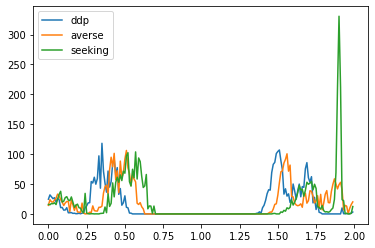

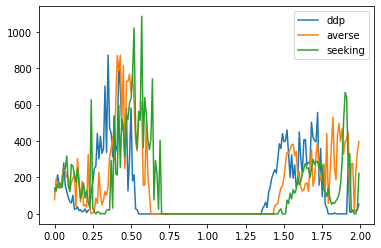

In [11]:
plt.figure("average contact forces")
plt.plot(time_array[:-1], ddp_fsim_mean[:], label="ddp")
plt.plot(time_array[:-1], averse_fsim_mean[:], label="averse")
plt.plot(time_array[:-1], seeking_fsim_mean[:], label="seeking")
plt.legend()


plt.figure("standard deviation contact forces")
plt.plot(time_array[:-1], ddp_fsim_std[:], label="ddp")
plt.plot(time_array[:-1], averse_fsim_std[:], label="averse")
plt.plot(time_array[:-1], seeking_fsim_std[:], label="seeking")
plt.legend()

## Tracking Errors 

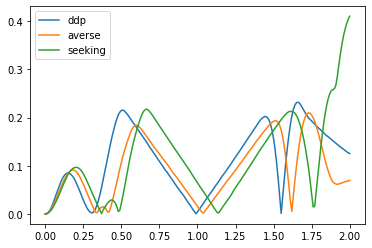

In [12]:
ddp_mean_tracking = np.abs(ddp_xsim_mean - ddp_xplan)
averse_mean_tracking = np.abs(averse_xsim_mean - averse_xplan)
seeking_mean_tracking = np.abs(seeking_xsim_mean - seeking_xplan)

plt.figure("hip tracking error mean")
plt.plot(time_array, ddp_mean_tracking[:,0], label="ddp")
plt.plot(time_array, averse_mean_tracking[:,0], label="averse")
plt.plot(time_array, seeking_mean_tracking[:,0], label="seeking")
plt.legend()

# Trajectory Statistics 

In [42]:
def plot_statistics_hip(means, stds, title, labels, save=False):
    """ a function that plots trajectory stats"""
    plt.figure(title, figsize=(12,8))
    colors = ["b", "g", "r"]
    xaxis_array = plan_dt*np.arange(means[0].shape[0])
    desired_height = 2.*np.ones_like(xaxis_array)
    rest_height = .5*np.ones_like(xaxis_array)
    plt.plot(xaxis_array, desired_height, '--k',linewidth=2.)
    plt.plot(xaxis_array, rest_height, '--k',linewidth=2.)
    for i in range(len(means)):
        plt.plot(xaxis_array, means[i], alpha=1., color=colors[i], linewidth=2., label=labels[i])
        plt.fill_between(xaxis_array, means[i]-stds[i], means[i]+stds[i], alpha=.15, color=colors[i])
    plt.xlabel("time [s]", fontsize=15.)
    plt.ylabel(title, fontsize=15.)
    plt.legend()
    if save:
        plt.savefig(title+".pdf")


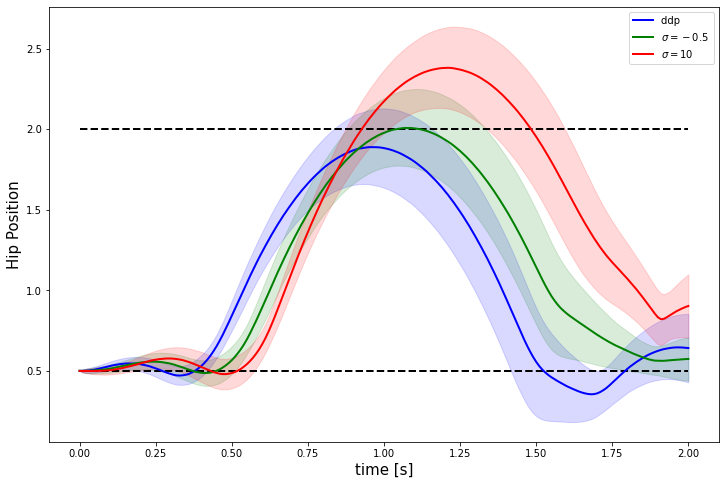

In [43]:
means = [ddp_xsim_mean[:,0], averse_xsim_mean[:,0], seeking_xsim_mean[:,0]]
stds = [ddp_xsim_std[:,0], averse_xsim_std[:,0], seeking_xsim_std[:,0]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_hip(means, stds, "Hip Position", labels, True)

In [44]:
def plot_statistics_foot(means, stds, title, labels, save=False):
    """ a function that plots trajectory stats"""
    plt.figure(title, figsize=(12,8))
    colors = ["b", "g", "r"]
    xaxis_array = plan_dt*np.arange(means[0].shape[0])
    desired_height = 1.5*np.ones_like(xaxis_array)
    rest_height = 0.*np.ones_like(xaxis_array)
    plt.plot(xaxis_array, desired_height, '--k',linewidth=2.)
    plt.plot(xaxis_array, rest_height, '--k',linewidth=2.)
    for i in range(len(means)):
        plt.plot(xaxis_array, means[i], alpha=1., color=colors[i], linewidth=2., label=labels[i])
        plt.fill_between(xaxis_array, means[i]-stds[i], means[i]+stds[i], alpha=.15, color=colors[i])
    plt.xlabel("time [s]", fontsize=15.)
    plt.ylabel(title, fontsize=15.)
    plt.legend()
    if save:
        plt.savefig(title+".pdf")


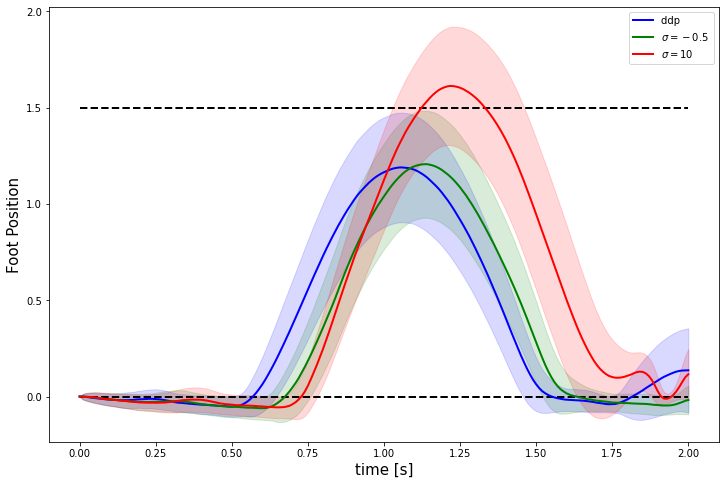

In [48]:
means = [ddp_foot_actual_mean, averse_foot_actual_mean, seeking_foot_actual_mean]
stds = [ddp_foot_actual_std, averse_foot_actual_std, seeking_foot_actual_std]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_foot(means, stds, "Foot Position", labels, True)

In [46]:
def plot_statistics_velocity(means, stds, title, labels, save=False):
    """ a function that plots trajectory stats"""
    plt.figure(title, figsize=(12,8))
    colors = ["b", "g", "r"]
    xaxis_array = plan_dt*np.arange(means[0].shape[0])
    for i in range(len(means)):
        plt.plot(xaxis_array, means[i], alpha=1., color=colors[i], linewidth=2., label=labels[i])
        plt.fill_between(xaxis_array, means[i]-stds[i], means[i]+stds[i], alpha=.15, color=colors[i])
    plt.xlabel("time [s]", fontsize=15.)
    plt.ylabel(title, fontsize=15.)
    plt.legend()
    if save:
        plt.savefig(title+".pdf")


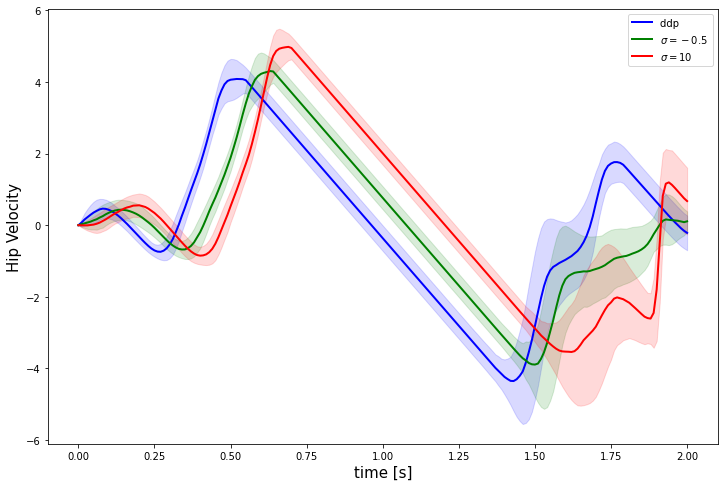

In [49]:
means = [ddp_xsim_mean[:,2],averse_xsim_mean[:,2], seeking_xsim_mean[:,2]]
stds = [ddp_xsim_std[:,2], averse_xsim_std[:,2], seeking_xsim_std[:,2]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Hip Velocity", labels,True)

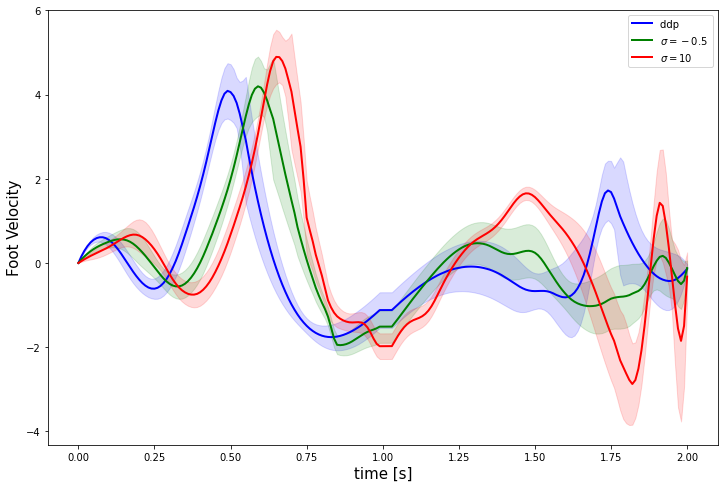

In [50]:
means = [ddp_xsim_mean[:,3],averse_xsim_mean[:,3], seeking_xsim_mean[:,3]]
stds = [ddp_xsim_std[:,3], averse_xsim_std[:,3], seeking_xsim_std[:,3]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Foot Velocity", labels, True)

# Error Statistics 

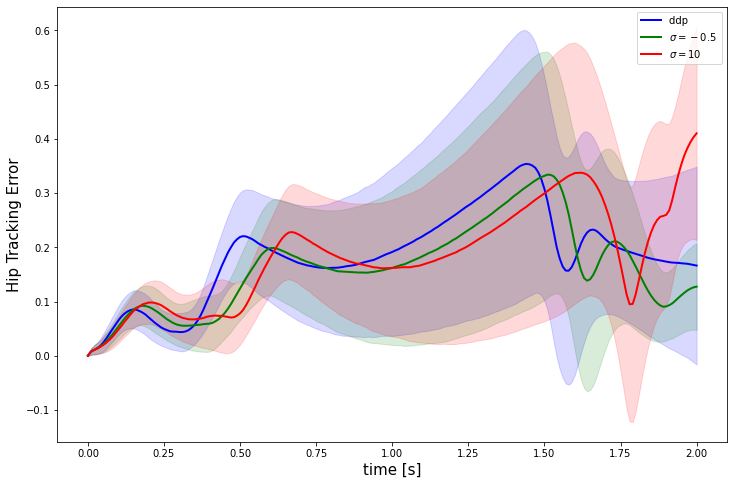

In [51]:
ddp_tracking = np.abs(ddp_xsim[:] - ddp_xplan) 
averse_tracking = np.abs(averse_xsim[:] - averse_xplan)
seeking_tracking = np.abs(seeking_xsim[:] - seeking_xplan) 

ddp_tracking_mean = np.mean(ddp_tracking, axis=0)
averse_tracking_mean = np.mean(averse_tracking, axis=0)
seeking_tracking_mean = np.mean(seeking_tracking, axis=0)

ddp_tracking_std = np.std(ddp_tracking, axis=0)
averse_tracking_std = np.std(averse_tracking, axis=0)
seeking_tracking_std = np.std(seeking_tracking, axis=0)


means = [ddp_tracking_mean[:,0],averse_tracking_mean[:,0], seeking_tracking_mean[:,0]]
stds = [ddp_tracking_std[:,0],averse_tracking_std[:,0], seeking_tracking_std[:,0]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Hip Tracking Error", labels, True)


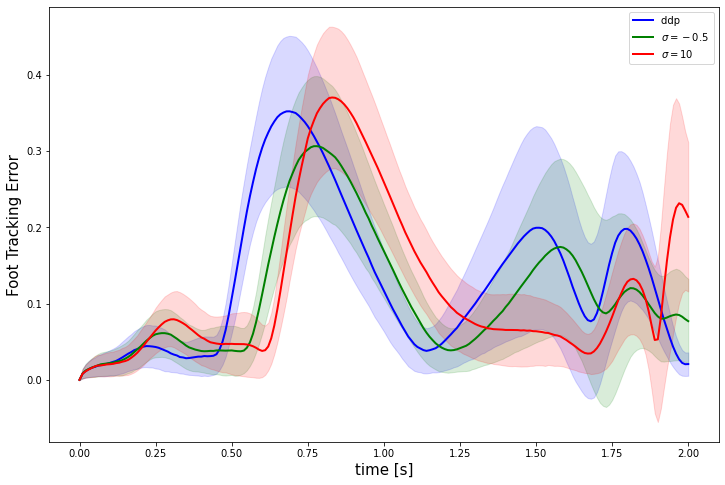

In [52]:
means = [ddp_tracking_mean[:,1],averse_tracking_mean[:,1], seeking_tracking_mean[:,1]]
stds = [ddp_tracking_std[:,1],averse_tracking_std[:,1], seeking_tracking_std[:,1]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Foot Tracking Error", labels, True)


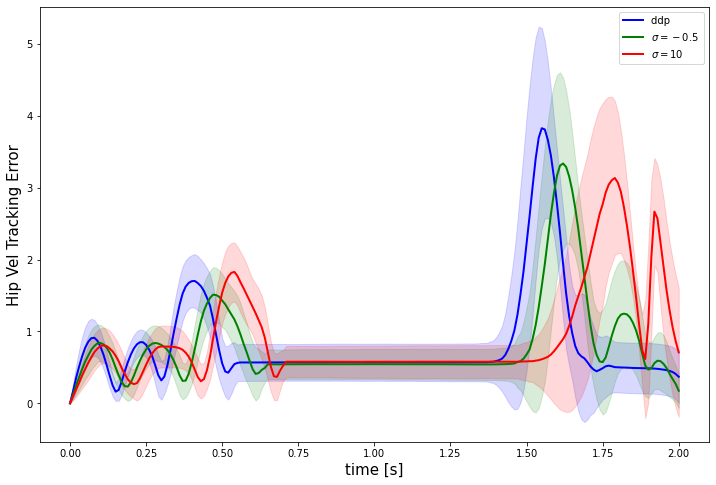

In [53]:
means = [ddp_tracking_mean[:,2],averse_tracking_mean[:,2], seeking_tracking_mean[:,2]]
stds = [ddp_tracking_std[:,2],averse_tracking_std[:,2], seeking_tracking_std[:,2]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Hip Vel Tracking Error", labels, True)

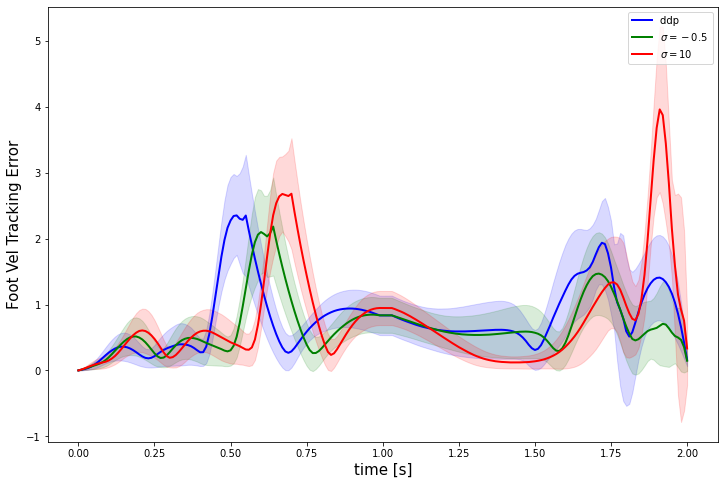

In [54]:
means = [ddp_tracking_mean[:,3],averse_tracking_mean[:,3], seeking_tracking_mean[:,3]]
stds = [ddp_tracking_std[:,3],averse_tracking_std[:,3], seeking_tracking_std[:,3]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Foot Vel Tracking Error", labels, True)

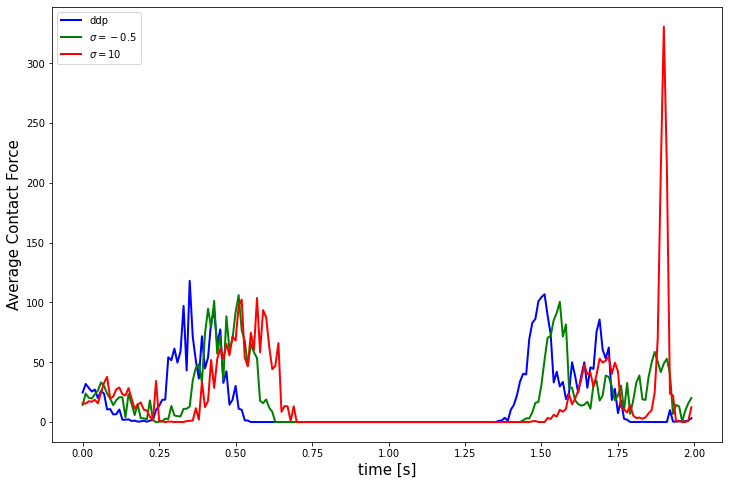

In [55]:
plt.figure("average contact forces", figsize=(12,8))
plt.plot(time_array[:-1], ddp_fsim_mean[:], 'b', linewidth=2., label="ddp")
plt.plot(time_array[:-1], averse_fsim_mean[:],'g', linewidth=2., label="$\sigma= -0.5$")
plt.plot(time_array[:-1], seeking_fsim_mean[:],'r', linewidth=2., label="$\sigma= 10.$")
plt.xlabel("time [s]", fontsize=15.)
plt.ylabel("Average Contact Force", fontsize=15.)
plt.legend()
title = "Average Contact Force"
plt.savefig(title+".pdf")


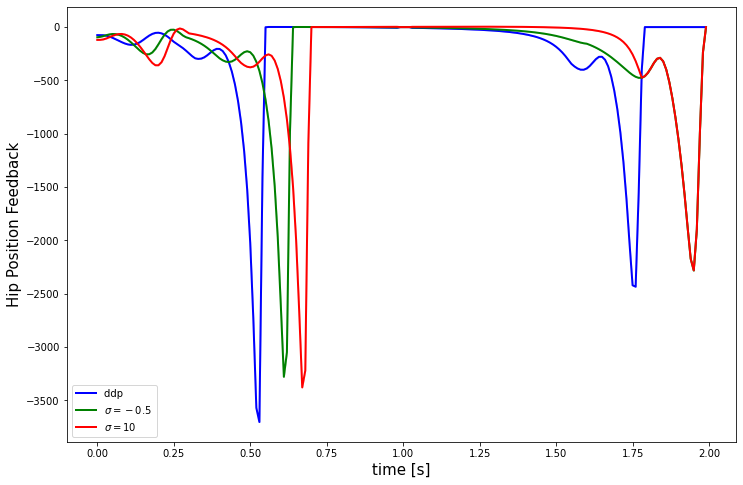

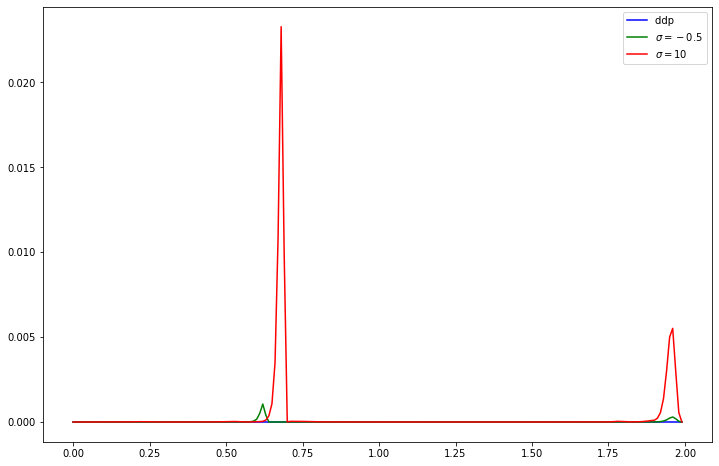

In [56]:
def plot_feedback_statistics(means, stds, title, labels, save=False):
    """ a function that plots trajectory stats"""
    plt.figure(title, figsize=(12,8))
    colors = ["b", "g", "r"]
    xaxis_array = plan_dt*np.arange(means[0].shape[0])
    for i in range(len(means)):
        plt.plot(xaxis_array, means[i], alpha=1., color=colors[i], linewidth=2., label=labels[i])
        plt.fill_between(xaxis_array, means[i]-stds[i], means[i]+stds[i], alpha=.15, color=colors[i])
    plt.xlabel("time [s]", fontsize=15.)
    plt.ylabel(title, fontsize=15.)
    plt.legend()
    if save:
        plt.savefig(title+".pdf")


means = [ddp_Ksim_mean[:,0], averse_Ksim_mean[:,0], seeking_Ksim_mean[:,0]]
stds = [ddp_Ksim_std[:,0], averse_Ksim_std[:,0], seeking_Ksim_std[:,0]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
        
plot_feedback_statistics(means, stds, "Hip Position Feedback", labels)

colors = ["b", "g", "r"]
plt.figure("Hip Position feedback deviation", figsize=(12,8))
for i in range(3):
    plt.plot(time_array[:-1], stds[i], colors[i], label=labels[i])
plt.legend()

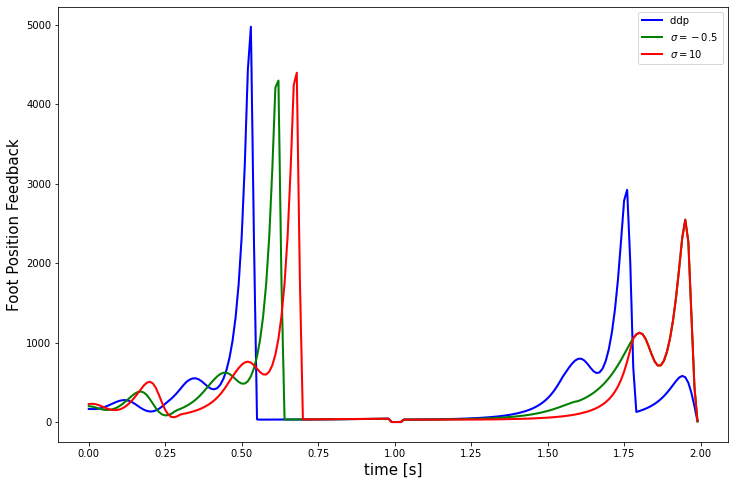

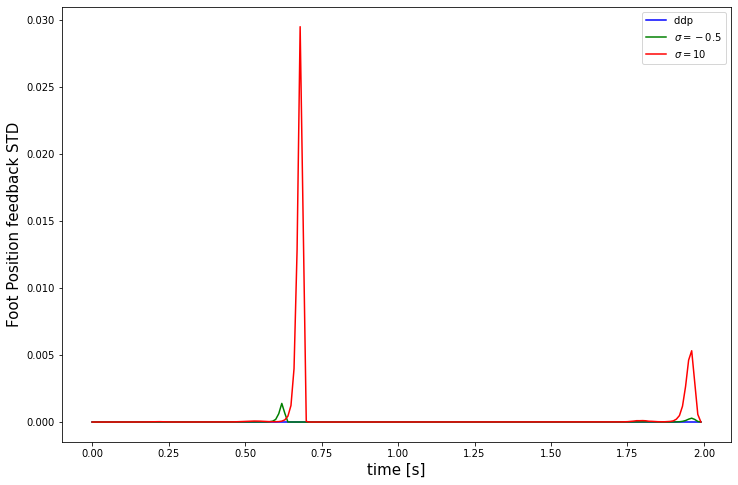

In [57]:
means = [ddp_Ksim_mean[:,1], averse_Ksim_mean[:,1], seeking_Ksim_mean[:,1]]
stds = [ddp_Ksim_std[:,1], averse_Ksim_std[:,1], seeking_Ksim_std[:,1]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
        
plot_feedback_statistics(means, stds, "Foot Position Feedback", labels, True)

colors = ["b", "g", "r"]
plt.figure("Foot Position feedback STD", figsize=(12,8))
for i in range(3):
    plt.plot(time_array[:-1], stds[i], colors[i], label=labels[i])
plt.xlabel("time [s]", fontsize=15.)
title = "Foot Position feedback STD"
plt.ylabel(title, fontsize=15.)
plt.legend()


plt.savefig(title+".pdf")

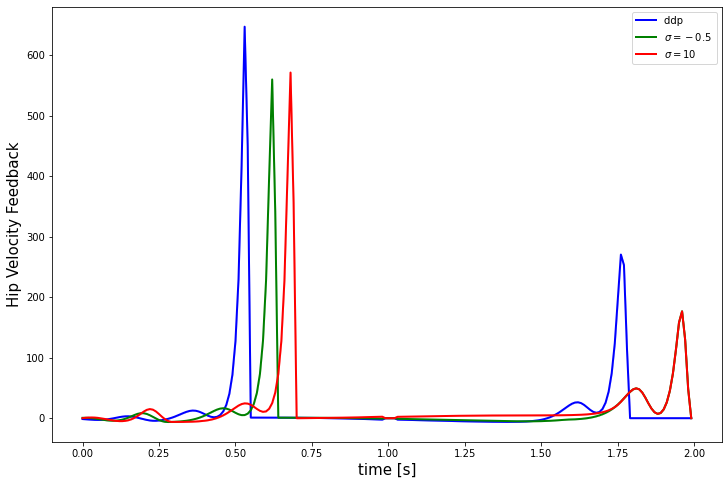

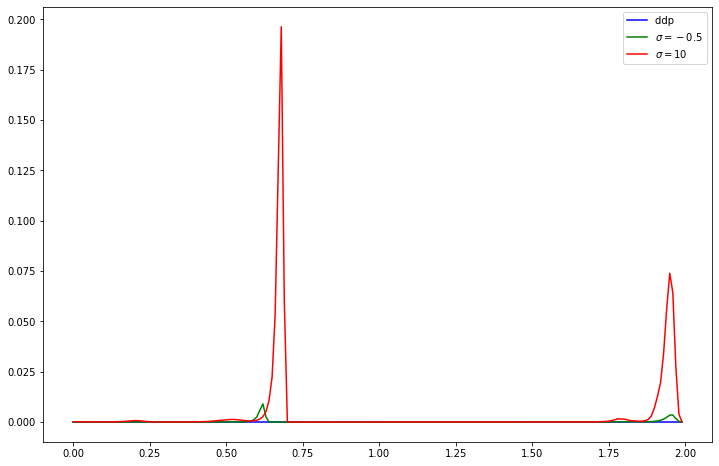

In [27]:
means = [ddp_Ksim_mean[:,2], averse_Ksim_mean[:,2], seeking_Ksim_mean[:,2]]
stds = [ddp_Ksim_std[:,2], averse_Ksim_std[:,2], seeking_Ksim_std[:,2]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
        
plot_feedback_statistics(means, stds, "Hip Velocity Feedback", labels)

colors = ["b", "g", "r"]
plt.figure("Hip Velocity feedback deviation", figsize=(12,8))
for i in range(3):
    plt.plot(time_array[:-1], stds[i], colors[i], label=labels[i])
plt.legend()

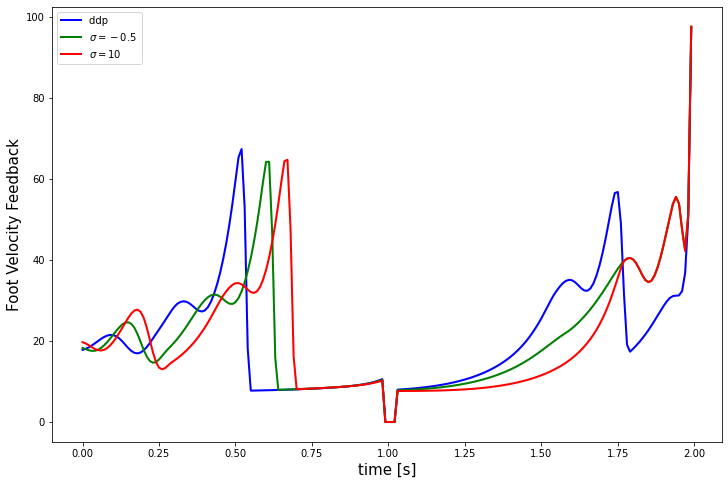

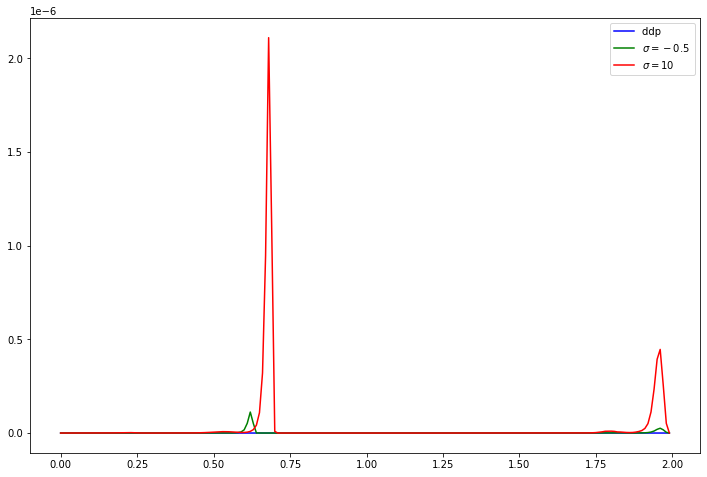

In [28]:
means = [ddp_Ksim_mean[:,3], averse_Ksim_mean[:,3], seeking_Ksim_mean[:,3]]
stds = [ddp_Ksim_std[:,3], averse_Ksim_std[:,3], seeking_Ksim_std[:,3]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
        
plot_feedback_statistics(means, stds, "Foot Velocity Feedback", labels)

colors = ["b", "g", "r"]
plt.figure("Foot Velocity feedback deviation", figsize=(12,8))
for i in range(3):
    plt.plot(time_array[:-1], stds[i], colors[i], label=labels[i])
plt.legend()

# Some Table Results

In [29]:
print("DDP Maximum Tracking Error Average")
for i in range(4):
    print(np.amax(ddp_tracking_mean[:,i]))
    
print("DDP Maximum Tracking Error STD")
for i in range(4):
    print(np.amax(ddp_tracking_std[:,i]))
    
    
print("Averse Maximum Tracking Error Average")
for i in range(4):
    print(np.amax(averse_tracking_mean[:,i]))
    
print("Averse Maximum Tracking Error STD")
for i in range(4):
    print(np.amax(averse_tracking_std[:,i]))
    
print("Seeking Maximum Tracking Error Average")
for i in range(4):
    print(np.amax(seeking_tracking_mean[:,i]))
    
print("Seeking Maximum Tracking Error STD")
for i in range(4):
    print(np.amax(seeking_tracking_std[:,i]))
    


DDP Maximum Tracking Error Average
0.353893483731994
0.35192636121569654
3.8283953647199382
2.3517263941770867
DDP Maximum Tracking Error STD
0.2484347271571683
0.133209623960593
1.815139181556048
1.2565626134020889
Averse Maximum Tracking Error Average
0.33405833507607285
0.3062645775348599
3.337575702440216
2.1825254964613467
Averse Maximum Tracking Error STD
0.23081467894567956
0.12262748971033373
1.6526972492541385
0.7433846114898468
Seeking Maximum Tracking Error Average
0.410228597774609
0.3700494497662601
3.1358621256357617
3.959553548907115
Seeking Maximum Tracking Error STD
0.2446030169754347
0.15050125864869615
1.5855870747212328
1.7045463350165353


In [30]:
print("DDP Maximum Hip Height Average")
print(np.amax(ddp_xsim_mean[:,0]))
        
print("Averse Maximum Hip Height Average")
print(np.amax(averse_xsim_mean[:,0]))

print("Seeking Maximum Hip Height Average")
print(np.amax(seeking_xsim_mean[:,0]))
    

print("DDP Maximum takeoff force Average")
print(np.amax(ddp_fsim_mean[:100]))
        
print("Averse Maximum takeoff force Average")
print(np.amax(averse_fsim_mean[:100]))

print("Seeking Maximum takeoff force Average")
print(np.amax(seeking_fsim_mean[:100]))
    
    
print("DDP Maximum landing force Average")
print(np.amax(ddp_fsim_mean[100:]))
        
print("Averse Maximum landing force Average")
print(np.amax(averse_fsim_mean[100:]))

print("Seeking Maximum landing force Average")
print(np.amax(seeking_fsim_mean[100:]))


DDP Maximum Hip Height Average
1.8886507074776118
Averse Maximum Hip Height Average
2.0073797827250157
Seeking Maximum Hip Height Average
2.380759037073281
DDP Maximum takeoff force Average
118.09890139465125
Averse Maximum takeoff force Average
106.14656961097795
Seeking Maximum takeoff force Average
103.71248244722152
DDP Maximum landing force Average
106.90174549380751
Averse Maximum landing force Average
100.52752625357911
Seeking Maximum landing force Average
330.5836645693585


# Visualization

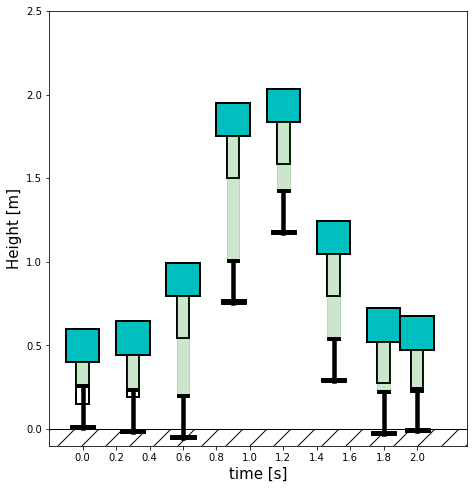

In [59]:
ax = None  

if ax is None:
    fig1 = plt.figure("visualization", figsize=(12,8))
    ax = fig1.add_subplot(111)
else:
    ax.clear()

endpoint = 2.1 
start_time_offset = 0.

ax.set_xlim([-0.2, endpoint + 0.2])
ax.set_ylim([-0.1, 2.5])

xticks = np.round(np.arange(0., 2.1, .2),4).tolist()
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_aspect('equal', 'box')


# Plot the ground.
ax.add_patch(m_patches.Rectangle(
    (-10, -0.1), 99., 0.1,
    fill=False,
    hatch='/',
))

vizz = visualize.PenumaticHopper1DViz([], [])

pts = [0, 30, 60, 90, 120, 150, 180, 200]
for i in pts:
    vizz.plot_index(i*plan_dt, averse_xsim_mean[i,0], averse_xsim_mean[i,1], ax)
plt.xlabel("time [s]", fontsize=15.)
title = "Height [m]"
plt.ylabel(title, fontsize=15.)
title = "visualization"
plt.savefig(title+".pdf")